## Problem Statement:

### About Company

**Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.**

### Business Need

***Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.***

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data

data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Drop the Loan Id column

data.drop('Loan_ID', axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### 1. Exploratory Data Analysis

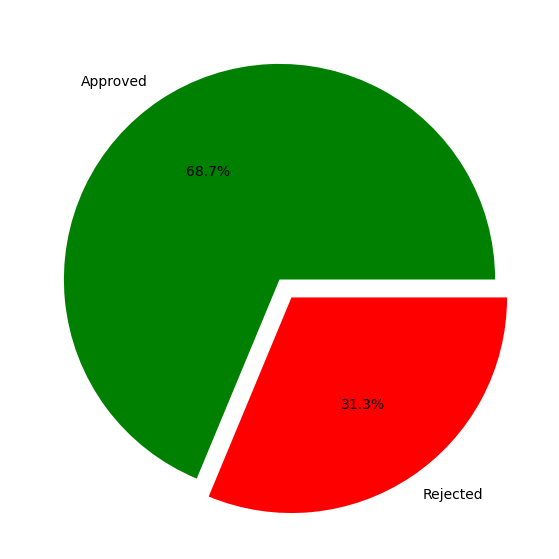

In [9]:
# Let's create a Pie-chart to represent the distribution in target variable

plt.figure(figsize = (13, 7))

sizes = data['Loan_Status'].value_counts().values
labels = ['Approved', 'Rejected']
colors = ['Green', 'Red']
explode = [0, .1]

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.show()

#### Let's first analyze the numerical data

In [10]:
data_num = data.select_dtypes(include = np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [11]:
data_num['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [12]:
data_num.drop(['Loan_Amount_Term', 'Credit_History'], axis =1 , inplace = True)

In [13]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


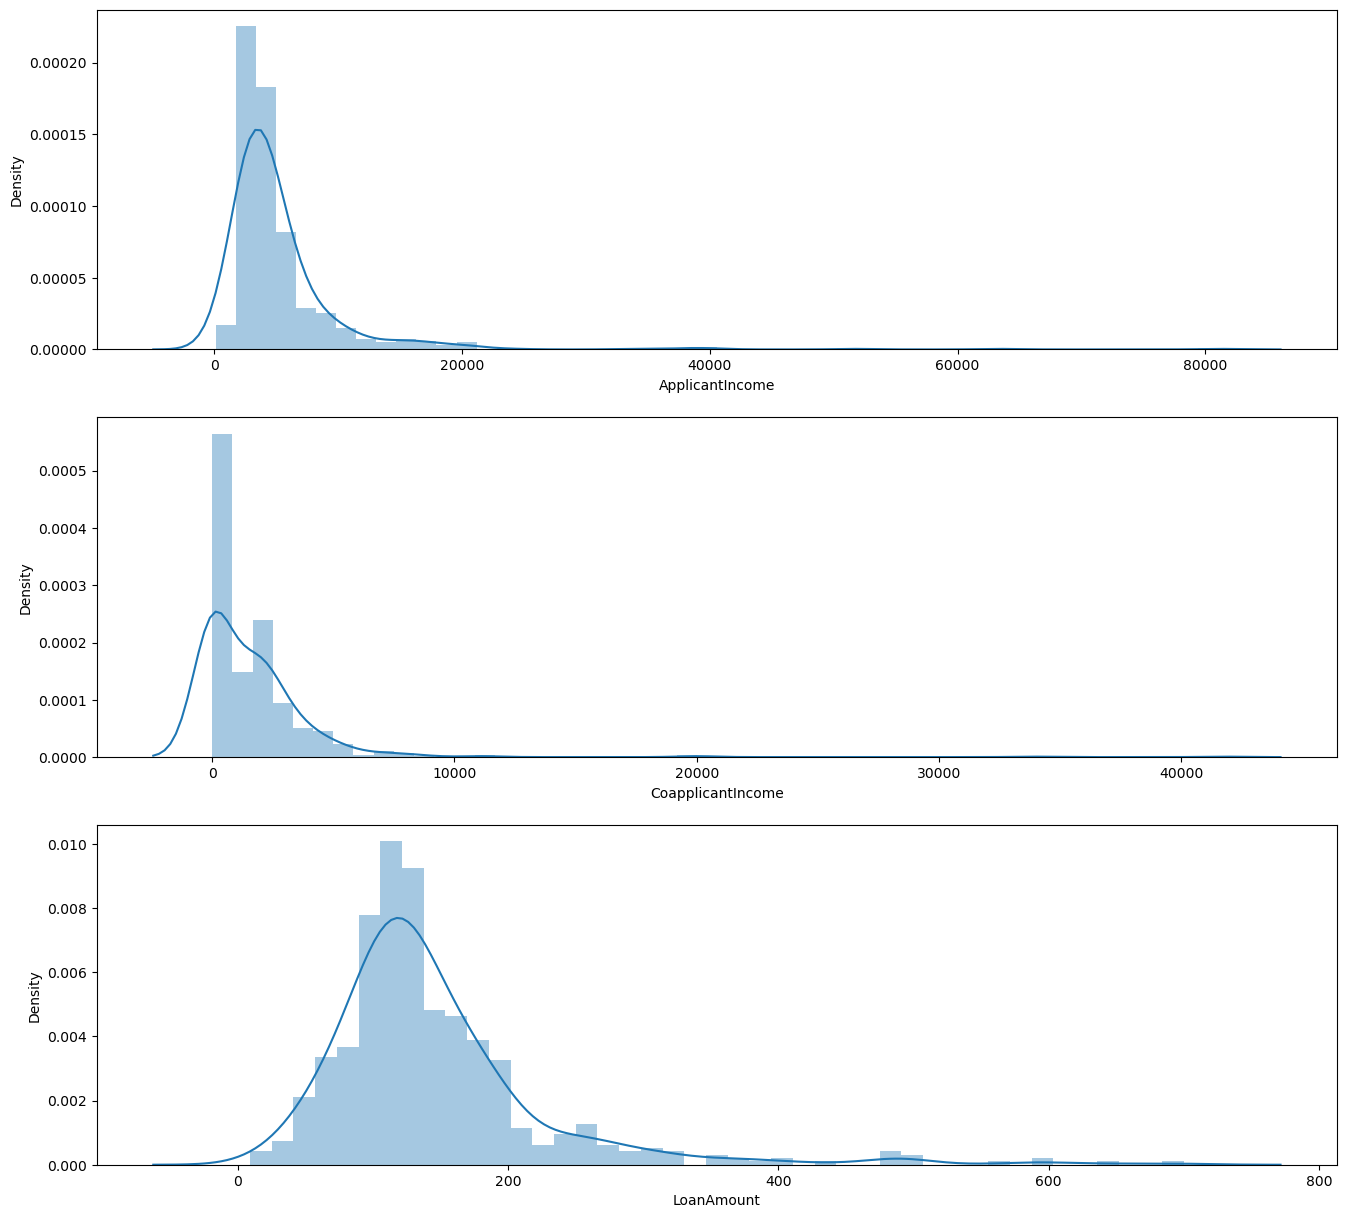

In [14]:
# Distribution Plot

fig, axs = plt.subplots(3, 1, figsize = (16, 15))

plt1 = sns.distplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.distplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.distplot(data['LoanAmount'], ax = axs[2])

plt.show()

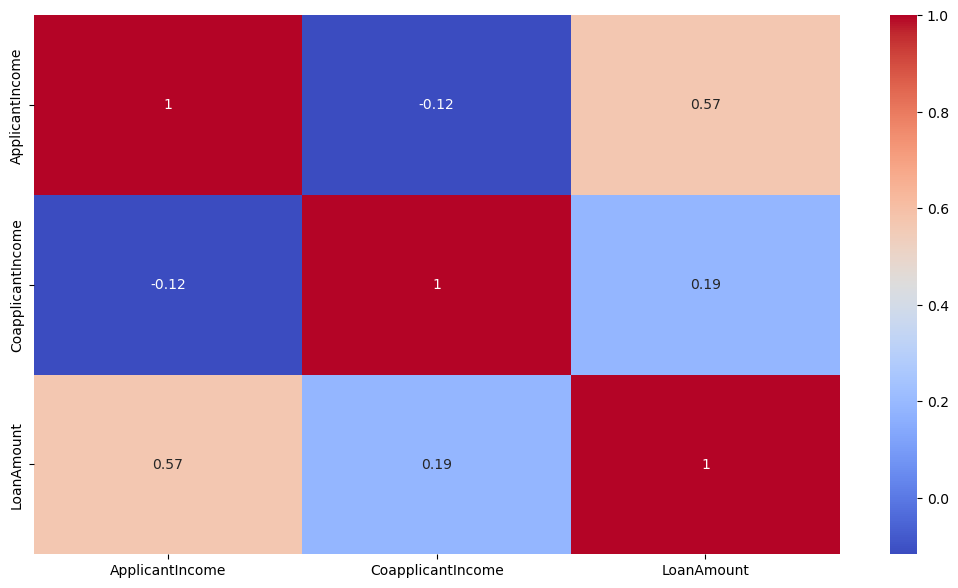

In [15]:
# Analyze the relation between these numerical columns

plt.figure(figsize = (13, 7))
sns.heatmap(data_num.corr(), annot = True, cmap = 'coolwarm')
plt.show()

### Analyze the Categorical Features

In [16]:
data_cat = data.select_dtypes(include = np.object)
data_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

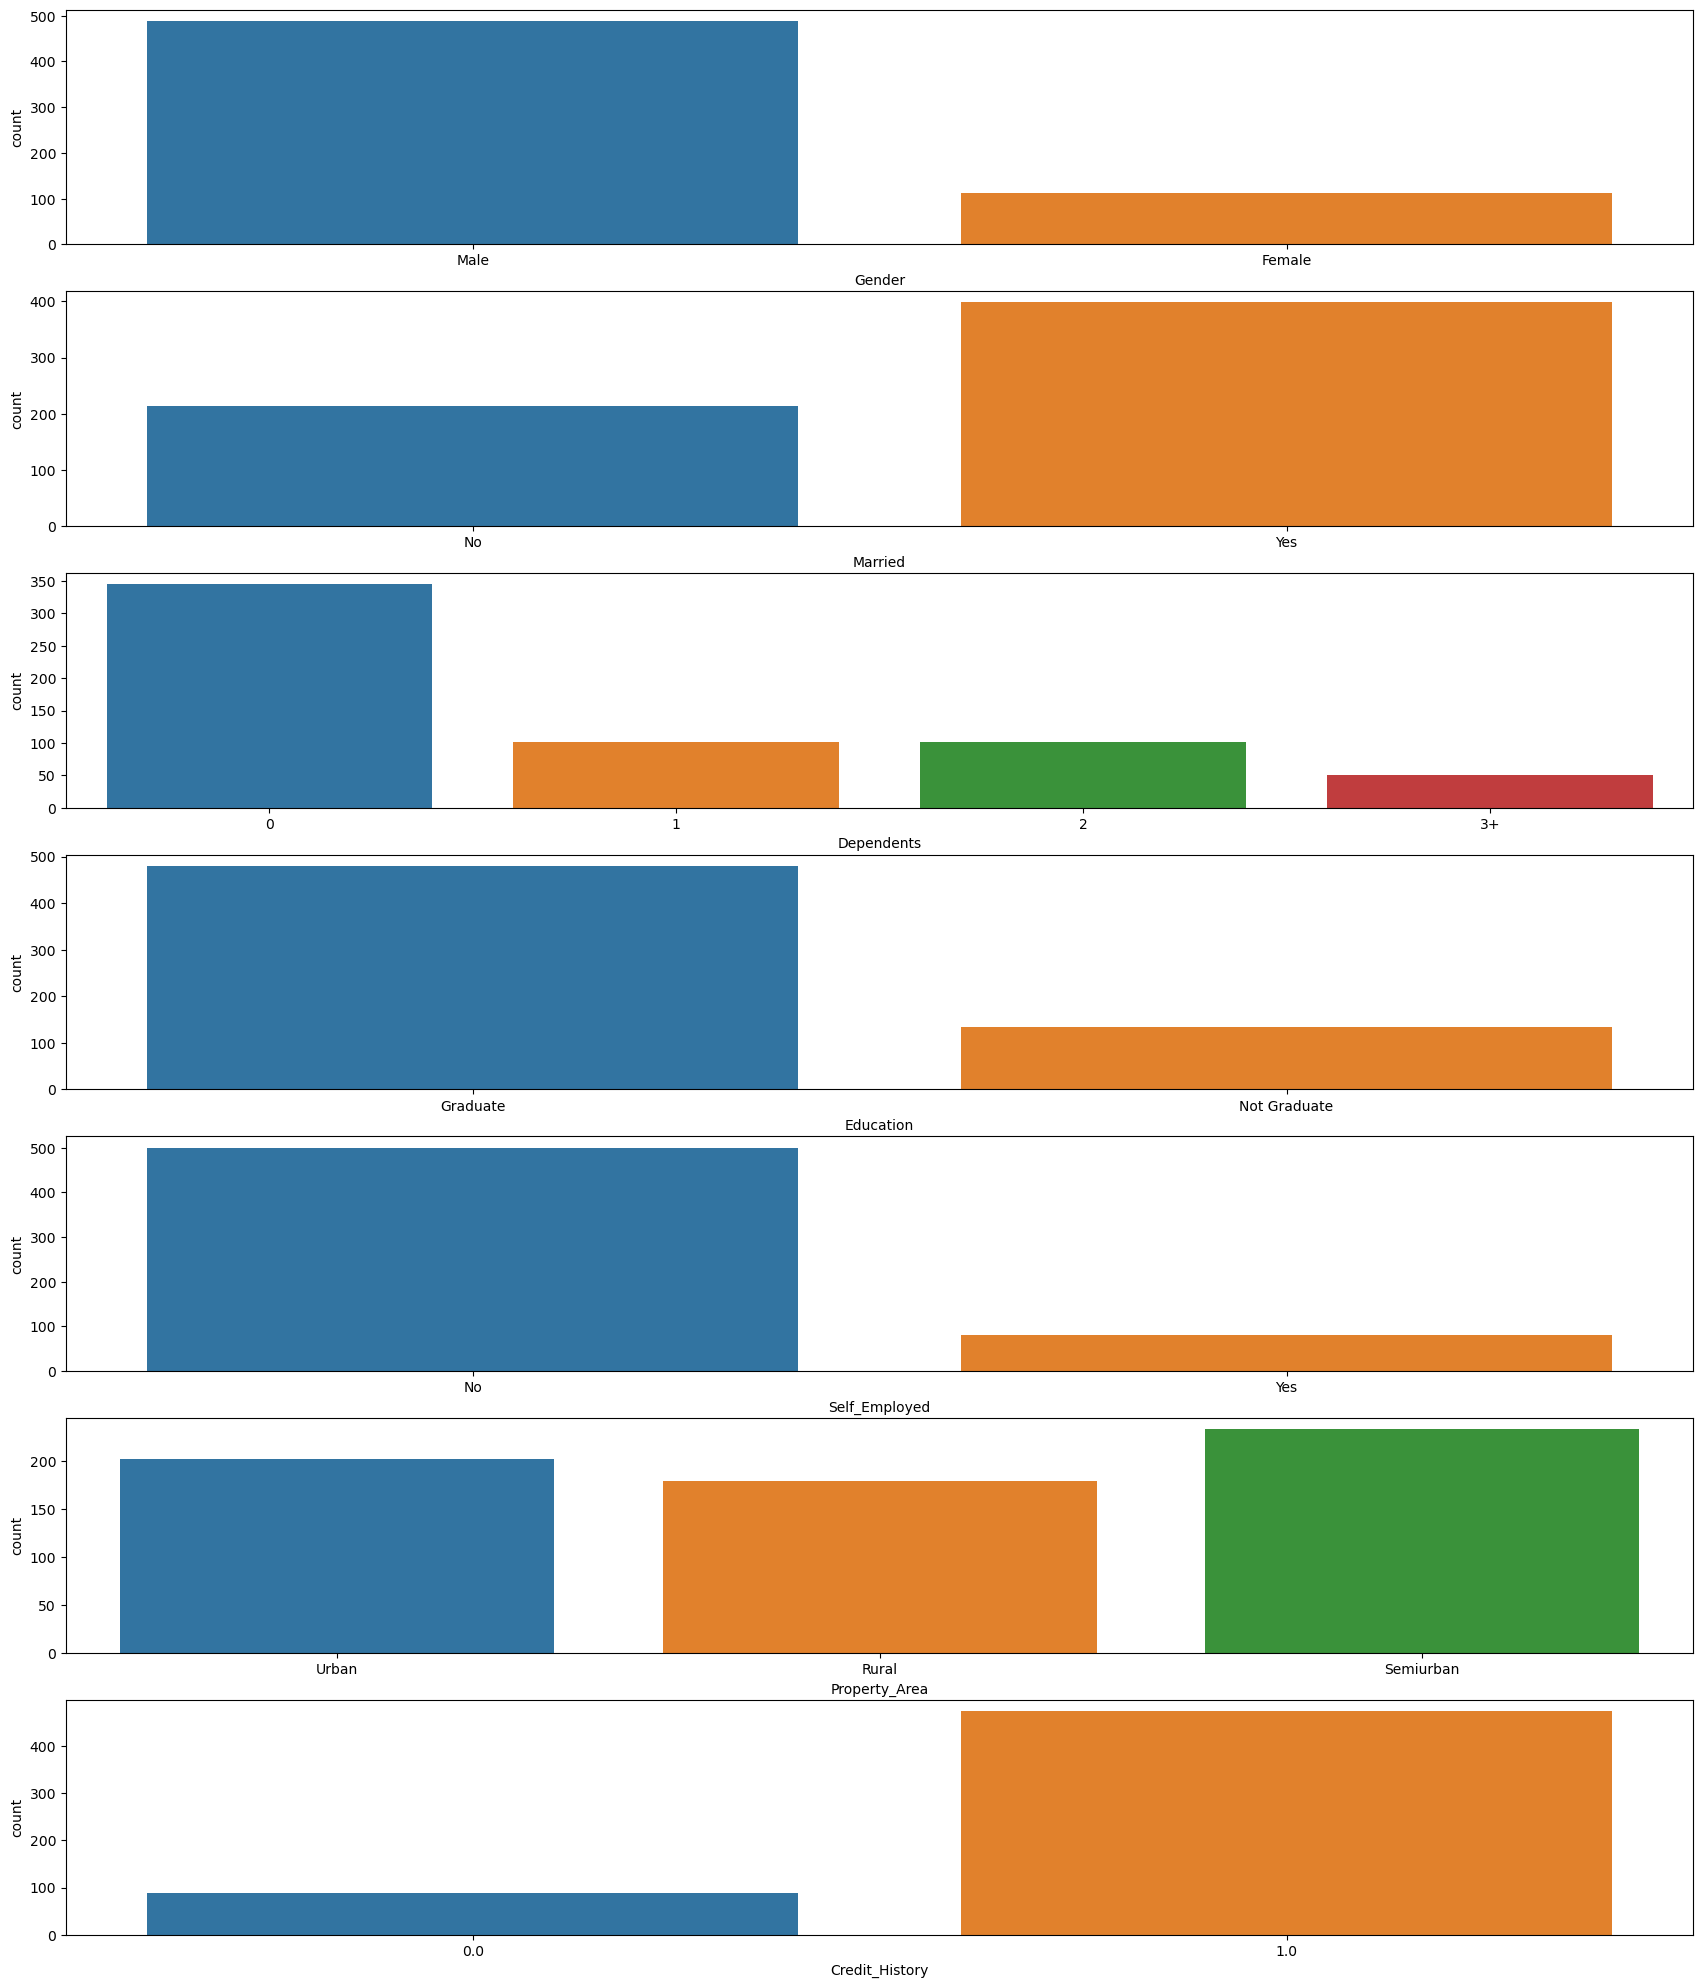

In [17]:
fig, ax = plt.subplots(7, 1, figsize = (21, 25))

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area', 'Credit_History']

for i ,val in enumerate(cols):
    sns.countplot(x = val, data = data, ax = ax[i])

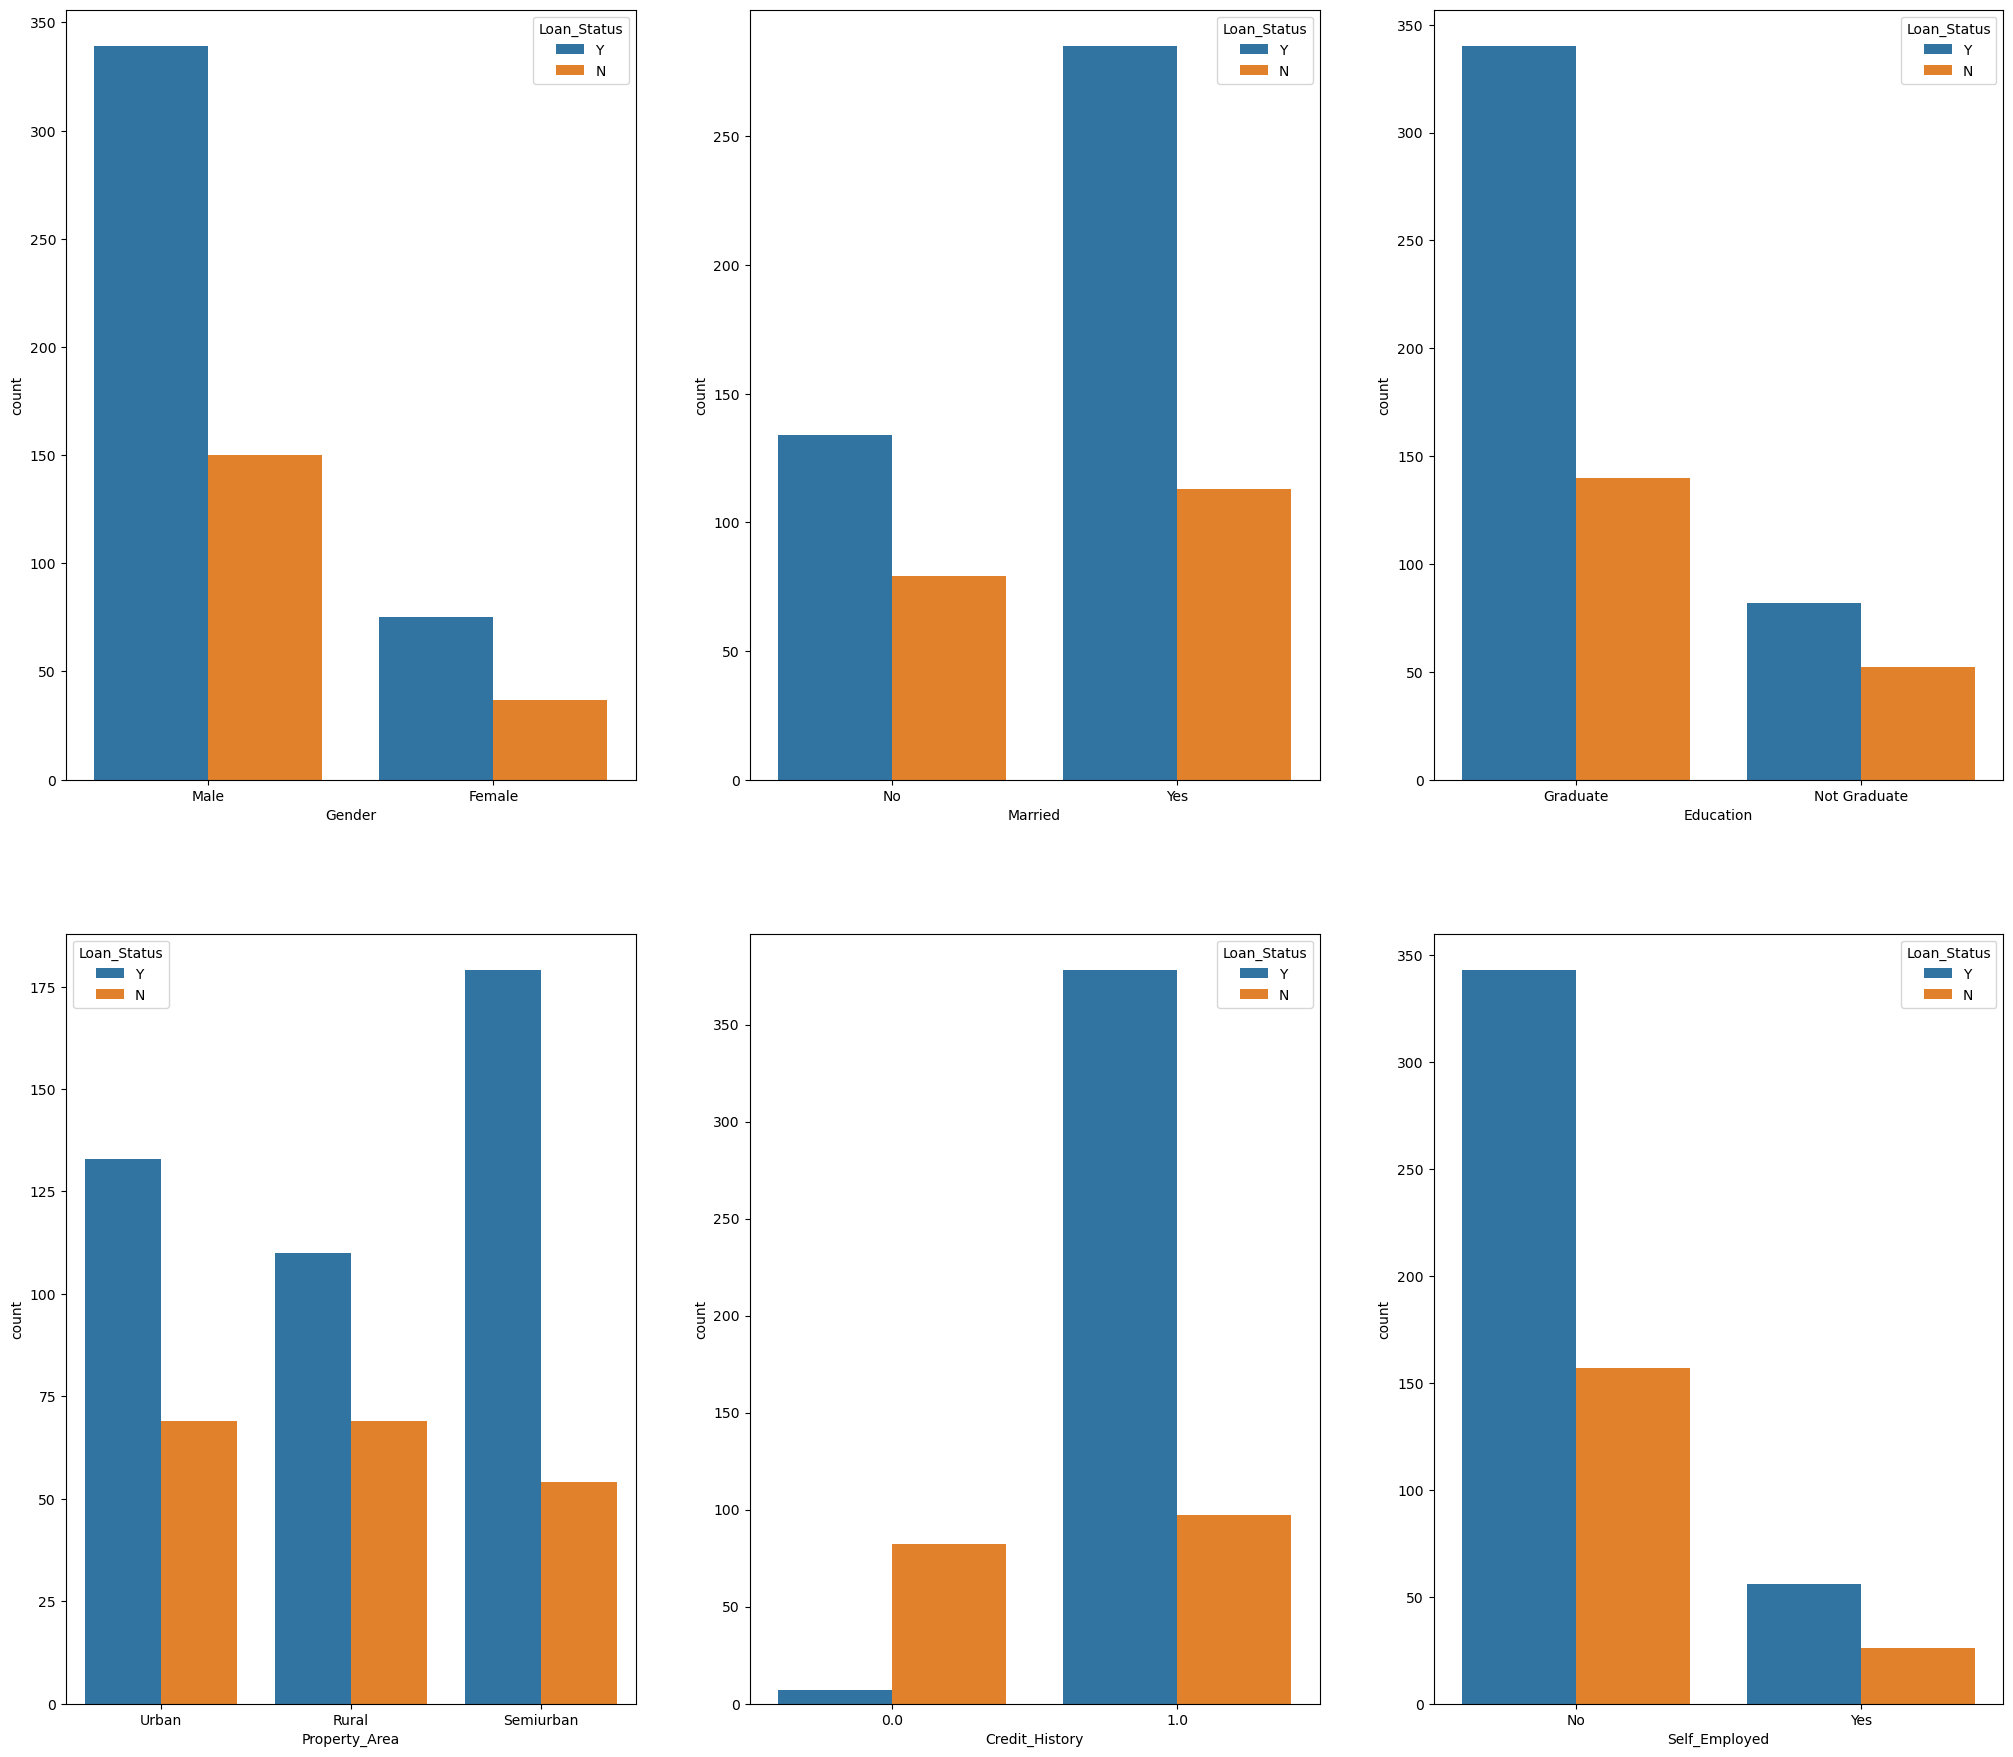

In [18]:
fig, ax = plt.subplots(2, 3, figsize = (25, 22))

sns.countplot(x = 'Gender', hue = 'Loan_Status', data=data, ax=ax[0][0])
sns.countplot(x = 'Married', hue = 'Loan_Status', data=data, ax=ax[0][1])
sns.countplot(x = 'Education', hue = 'Loan_Status', data=data, ax=ax[0][2])
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data=data, ax=ax[1][0])
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data=data, ax=ax[1][1])
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data=data, ax=ax[1][2])

plt.show()

### 2. Feature Engineering

In [19]:
## Checking the missing values
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data['Gender'].mode()[0]

'Male'

In [21]:
### Let's impute the missing values with statistical data


data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)


data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### Handling Categorical Data

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area', 'Loan_Status']

for i in cols:
    data[i] = le.fit_transform(data[i])

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### Handle the Outliers

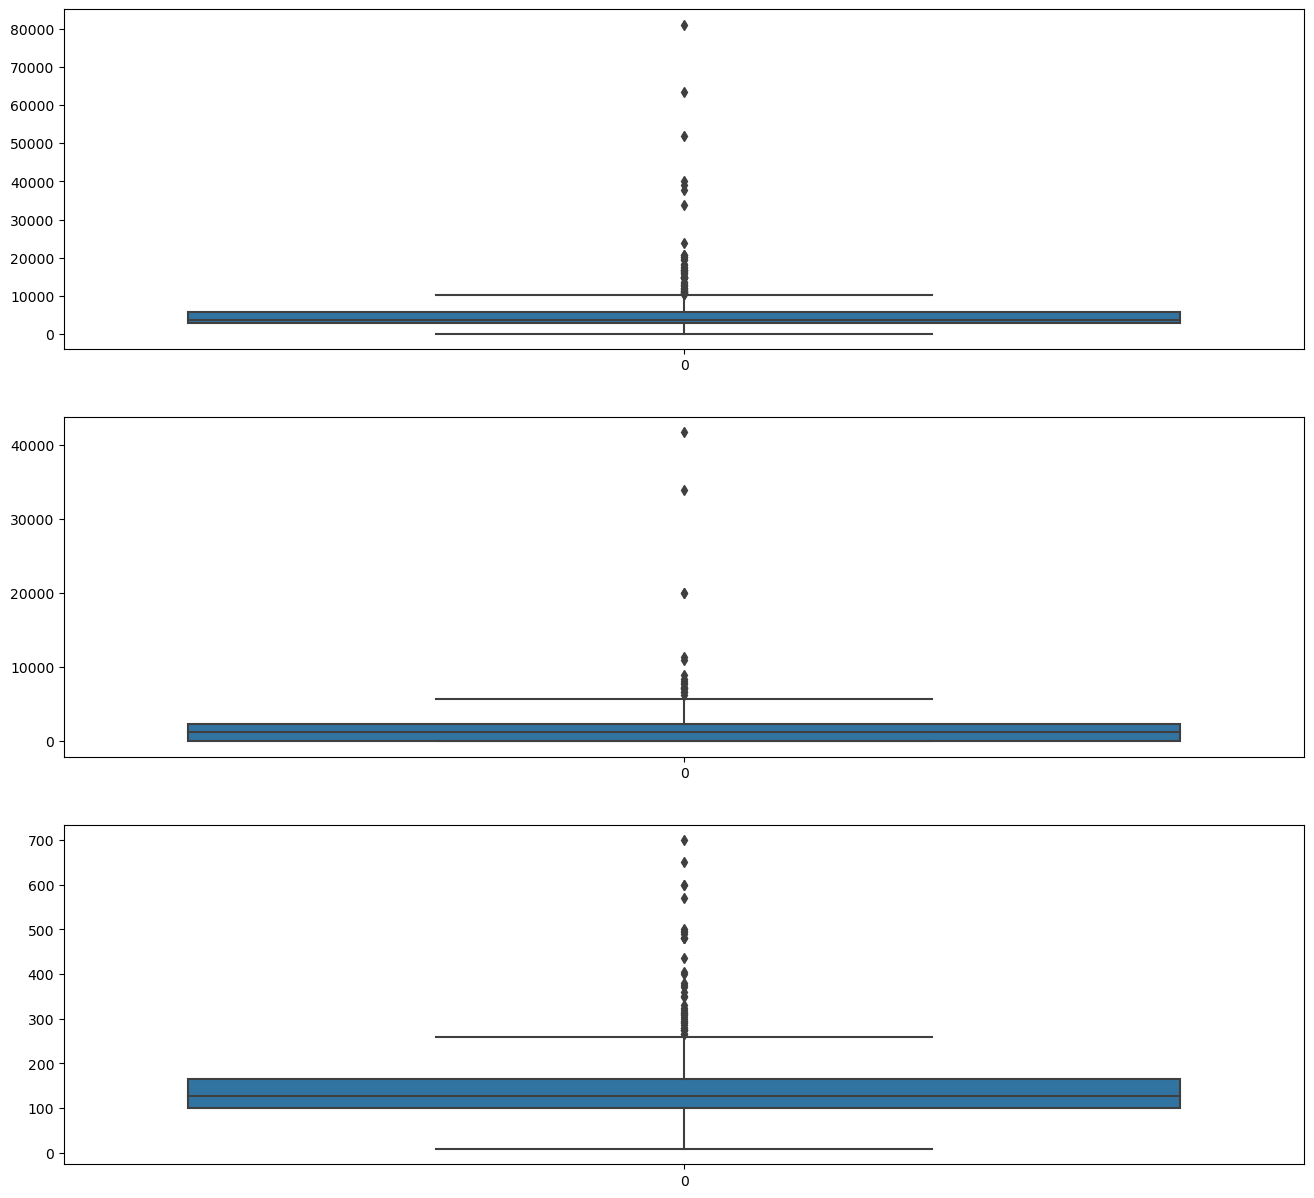

In [25]:
# Let's analyze the boxplot before handling an outliers

fig, axs = plt.subplots(3, 1, figsize = (16, 15))

plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2])

plt.show()

In [26]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)

Q1, Q3

(2877.5, 5795.0)

In [27]:
data['ApplicantIncome'].max()

81000

In [28]:
IQR = Q3 - Q1
IQR

2917.5

In [29]:
upper_bound = Q3 + 3*IQR
lower_bound = Q1 - 3*IQR

upper_bound, lower_bound

(14547.5, -5875.0)

In [30]:
## Outlier Detection for Applicant Income

data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]

In [31]:
## Outlier Detection for Co-Applicant Income

Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)

data = data[(data['CoapplicantIncome'] >= Q1-3*IQR) & (data['CoapplicantIncome'] <= Q3+3*IQR)]

In [32]:
## Outlier Detection for Loan Amount

Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)

data = data[(data['LoanAmount'] >= Q1-3*IQR) & (data['LoanAmount'] <= Q1+3*IQR)]

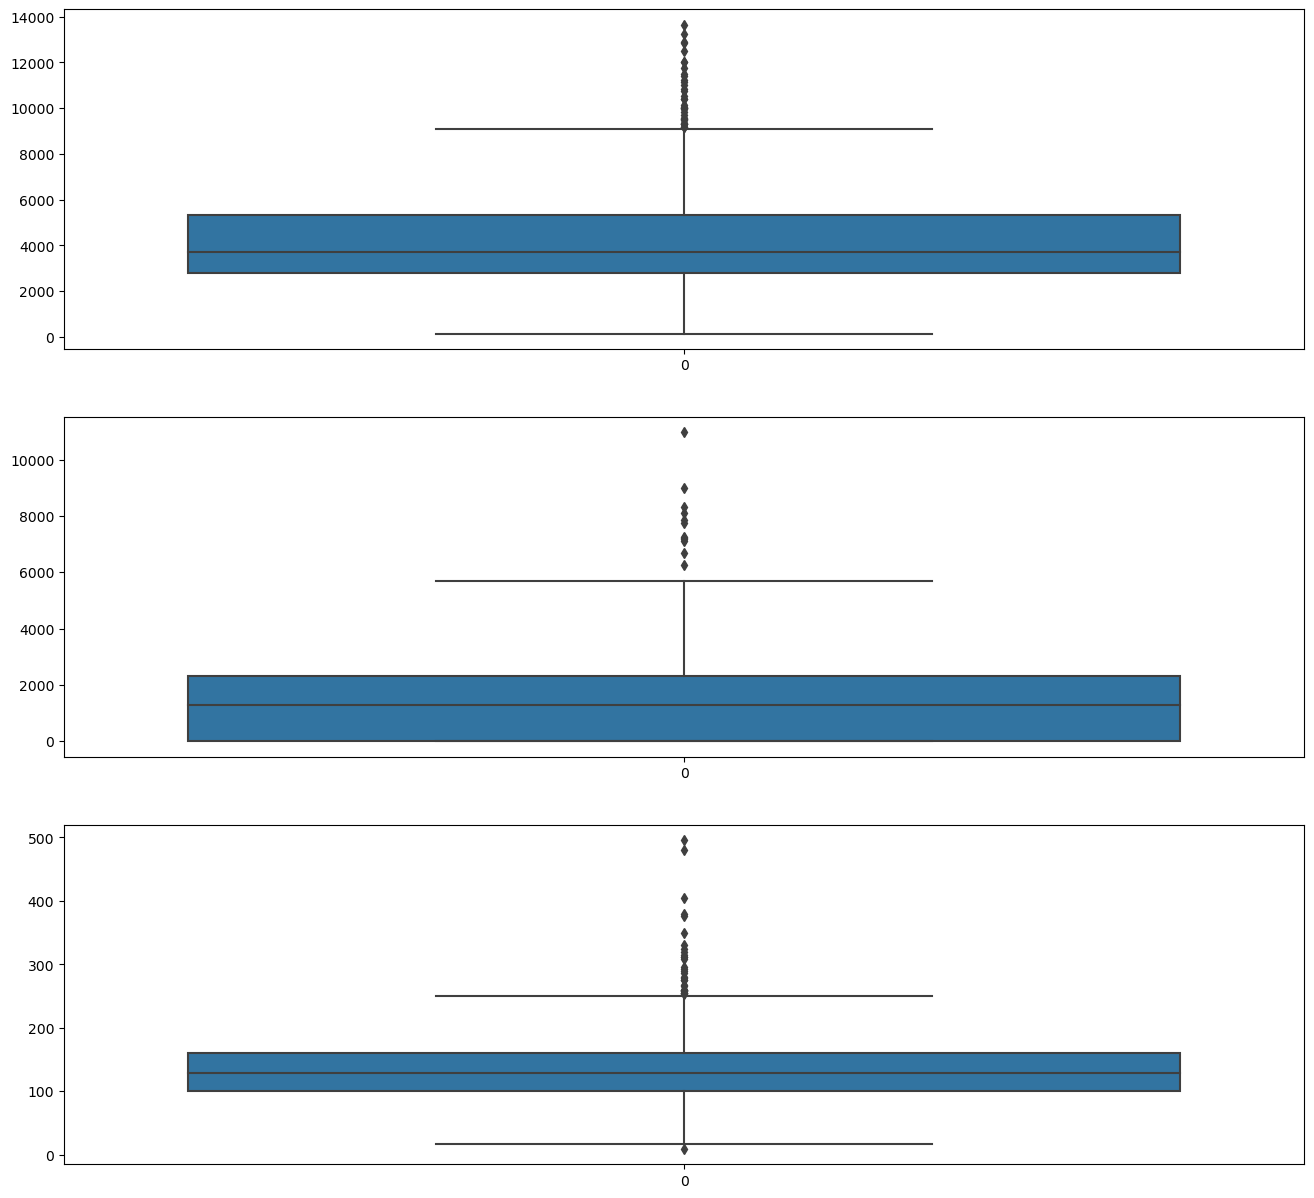

In [33]:
# Let's analyze the boxplot before handling an outliers

fig, axs = plt.subplots(3, 1, figsize = (16, 15))

plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0])
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1])
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2])

plt.show()

### 3. Feature Selection 

In [35]:
from sklearn.feature_selection import chi2

In [36]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
x1 = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
     'Credit_History', 'Property_Area']]

y1 = data['Loan_Status']

In [38]:
score = chi2(x1, y1)

In [39]:
score

(array([ 0.09634349,  1.60098818,  0.1207755 ,  4.32301341,  0.34833465,
        25.5735173 ,  0.30133919]),
 array([7.56262517e-01, 2.05763227e-01, 7.28194916e-01, 3.76002804e-02,
        5.55057361e-01, 4.25844022e-07, 5.83044083e-01]))

#### Test for Independence (For Categorical Data only)

- Null Hypothesis: Variables are independent to each other.
- Alternate Hypotheis: Variable are dependent.

***If the p-value is <=0.05, then we can reject the Null hypothesis otherwise we need to accept it.***

In [40]:
p_values = pd.Series(score[1], index = x1.columns)

In [41]:
p_values

Gender            7.562625e-01
Married           2.057632e-01
Dependents        7.281949e-01
Education         3.760028e-02
Self_Employed     5.550574e-01
Credit_History    4.258440e-07
Property_Area     5.830441e-01
dtype: float64

In [42]:
irr_cols = []

for x in p_values.index:
    if p_values[x] <= 0.05:
        print(x, ':- Reject the Null Hypothesis')
    else:
        print(x, ':- Accept the Null Hypothesis')
        irr_cols.append(x)

Gender :- Accept the Null Hypothesis
Married :- Accept the Null Hypothesis
Dependents :- Accept the Null Hypothesis
Education :- Reject the Null Hypothesis
Self_Employed :- Accept the Null Hypothesis
Credit_History :- Reject the Null Hypothesis
Property_Area :- Accept the Null Hypothesis


In [43]:
irr_cols

['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']

In [44]:
## Drop all the irrelevant columns

data.drop(labels = irr_cols, axis = 1 , inplace = True)

In [45]:
data.drop('Loan_Amount_Term', axis = 1, inplace = True)

In [46]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1.0,1
1,0,4583,1508.0,128.0,1.0,0
2,0,3000,0.0,66.0,1.0,1
3,1,2583,2358.0,120.0,1.0,1
4,0,6000,0.0,141.0,1.0,1


In [47]:
## Data Split

X = data.drop('Loan_Status', axis = 1)  #Features
y = data['Loan_Status']                 #Target

In [48]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((461, 5), (116, 5), (461,), (116,))

## 4. Model Building

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [51]:
# Fit the training data on DT Model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
## Makes Prediction with the Model

pred = dt.predict(X_test)

### 5. Model Evaluation

In [53]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [54]:
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.6896551724137931


In [55]:
print("F1 Score: ", f1_score(y_test, pred))

F1 Score:  0.7804878048780488


In [56]:
print("AUC Score: ", roc_auc_score(y_test, pred))

AUC Score:  0.6345351043643264


In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.52      0.47        31
           1       0.81      0.75      0.78        85

    accuracy                           0.69       116
   macro avg       0.62      0.63      0.63       116
weighted avg       0.71      0.69      0.70       116



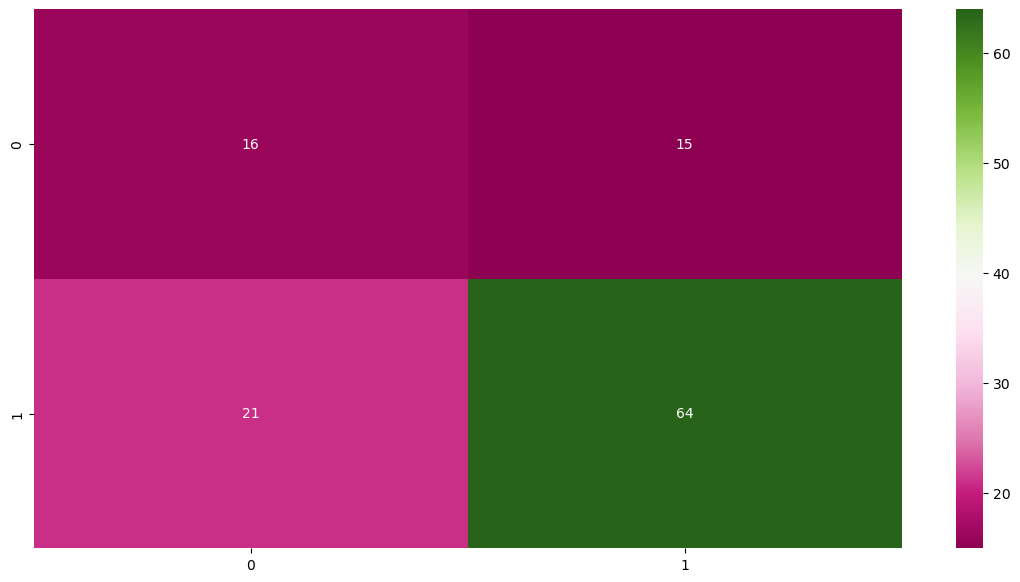

In [58]:
## Plot the confusion Matrix

plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, cmap = 'PiYG')
plt.show()

## Hyper Parameter Tunning

### Manual Tunning

In [59]:
dt_tune = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [60]:
# Fit the training data on DT Model
dt_tune.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [61]:
## Makes Prediction with the Model

pred_t = dt_tune.predict(X_test)

In [62]:
print(classification_report(y_test, pred_t))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61        31
           1       0.83      0.99      0.90        85

    accuracy                           0.84       116
   macro avg       0.88      0.72      0.76       116
weighted avg       0.86      0.84      0.82       116



In [63]:
print("AUC Score: ", roc_auc_score(y_test, pred_t))

AUC Score:  0.7199240986717268


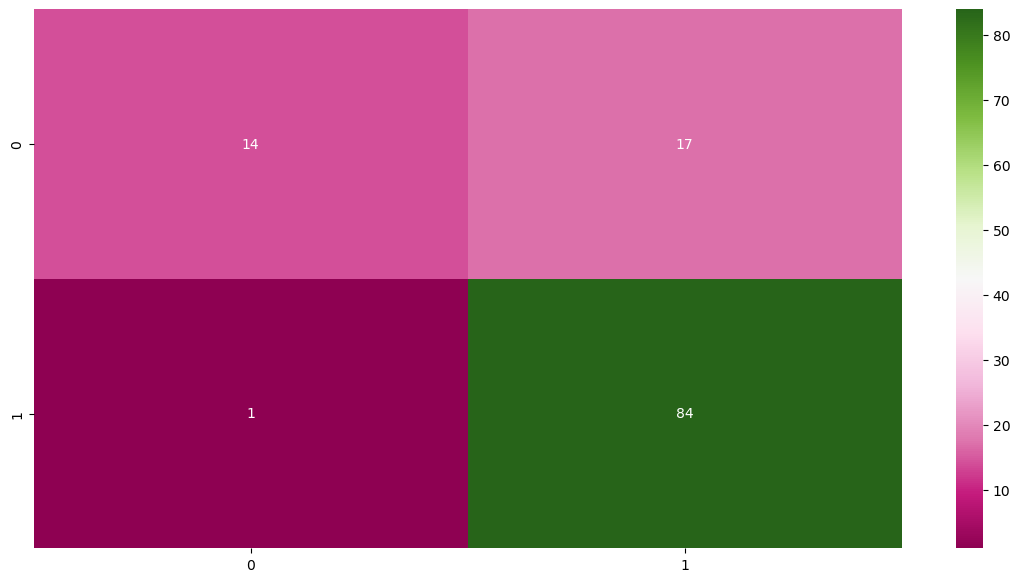

In [64]:
## Plot the confusion Matrix

plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, pred_t), annot = True, cmap = 'PiYG')
plt.show()

### Grid Search CV

In [65]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [66]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 50, 20)]

# Minimum number of samples required to split a node
min_samples_split = [5, 8, 10, 12, 15, 20, 30, 35, 40]

param_grid = {'max_depth': max_depth,
                'min_samples_split': min_samples_split,
              'criterion':['entropy', 'gini impurity']}

In [67]:
grid_model = GridSearchCV(dt, param_grid, cv = 3)

In [68]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini impurity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 10, 12, 15, 20, 30, 35,
                                               40]})

In [69]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20)

In [72]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 20}

In [73]:
dt_grid = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20)

In [74]:
# Fit the training data on DT Model
dt_grid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20)

In [75]:
## Makes Prediction with the Model

pred_g = dt_grid.predict(X_test)

In [76]:
print(classification_report(y_test, pred_g))

              precision    recall  f1-score   support

           0       0.92      0.35      0.51        31
           1       0.81      0.99      0.89        85

    accuracy                           0.82       116
   macro avg       0.86      0.67      0.70       116
weighted avg       0.84      0.82      0.79       116



In [57]:
# saving the model 
import pickle 
pickle_out = open("Automating_Loan_Prediction_System.pkl", mode = "wb") 
pickle.dump(dt, pickle_out) 
pickle_out.close()